In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib .pyplot as plt
import math

In [3]:
#importing the data
df = pd.read_csv('Dataset.csv', names=['x','y'])

#organising the data
data = np.array([df['x'],df['y']])

In [4]:
#centering in lower dimension
mean_x = np.sum(data[0])/1000
mean_y = np.sum(data[1])/1000

data[0] = np.subtract(data[0], mean_x)
data[1] = np.subtract(data[1], mean_y)

In [14]:
def findKernelPolynomial(d):
    polynomial_K = np.matmul(data.transpose(), data)

    for i in range(0,1000):
        for j in range(0,1000):
            polynomial_K[i][j] = (polynomial_K[i][j] + 1)**d
    return polynomial_K
    
def centerKernel(Kernel):
    one_n = np.zeros([1000,1000])
    for i in range(0,1000):
        for j in range(0,1000):
            one_n[i][j] = (1/1000); 

    one_nK = np.matmul(one_n, Kernel)   
    identity = np.identity(1000)

    i_one_n = np.subtract(identity, one_n)
    Kcentered = np.matmul(i_one_n, Kernel)
    Kcentered = np.matmul(Kcentered, i_one_n)
    return Kcentered

def polynomialPCA(Kcentered):
    eigen_values, eigen_vectors = eig(Kcentered)
    eigen_values = np.real(eigen_values)
    eigen_vectors = eigen_vectors.transpose()
    
    eigen_values_copy = np.real(eigen_values)
    
    max_index = np.argmax(eigen_values)

    max_eigen_value = eigen_values[max_index]
    max_eigen_vector = np.real(eigen_vectors[max_index])

    aplha = np.real(np.divide(max_eigen_vector, math.sqrt(max_eigen_value)))

    eigen_values = np.delete(eigen_values, max_index, axis=0)
    eigen_vectors = np.delete(eigen_vectors, max_index, axis = 0)

    second_max_index = np.argmax(eigen_values)

    second_max_eigen_value = eigen_values[second_max_index]
    second_max_eigen_vector = np.real(eigen_vectors[second_max_index])
    
    print("variance along maximum eigen vector")
    print(max_eigen_value/sum(eigen_values_copy)*100)
    
    print("variance along second maximum eigen vector")
    print(second_max_eigen_value/sum(eigen_values_copy)*100)
    
    aplha_second = np.real(np.divide(second_max_eigen_vector, math.sqrt(second_max_eigen_value)))
    line1 = np.matmul(Kcentered,aplha)
    line2 = np.matmul(Kcentered,aplha_second)
    plt.title("projection of each point in the dataset onto the top-2 components")
    plt.xlabel("along the direcction of principal component1")
    plt.ylabel("along the direcction of principal component2")
    plt.scatter(line1, line2)
    plt.show()

Kernel PCA for Polynomial Kernel Map function with degree 2
variance along maximum eigen vector
36.295566977318
variance along second maximum eigen vector
32.234676717591846


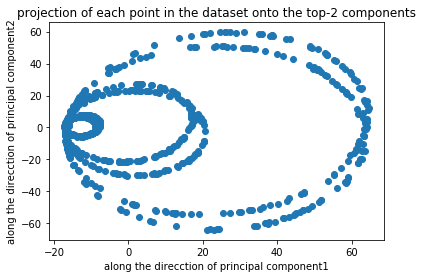

In [15]:
#compute the kernel map
Kernel = findKernelPolynomial(2)
print("Kernel PCA for Polynomial Kernel Map function with degree 2")
#center in higher dimension
Kcentered = centerKernel(Kernel)
#perform the PCA
polynomialPCA(Kcentered)

Kernel PCA for Polynomial Kernel Map function with degree 3
variance along maximum eigen vector
41.160512156500545
variance along second maximum eigen vector
32.252691529135156


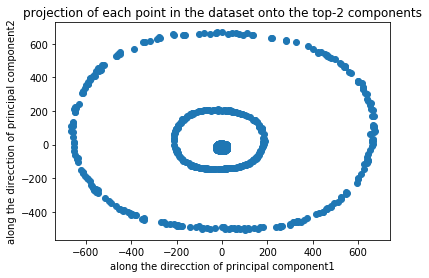

In [16]:
#compute the kernel map
Kernel = findKernelPolynomial(3)
print("Kernel PCA for Polynomial Kernel Map function with degree 3")
#center in higher dimension
Kcentered = centerKernel(Kernel)
#perform the PCA
polynomialPCA(Kcentered)

In [17]:
def findKernelExponental(sigma):
    exponental_k = np.zeros([1000,1000])
    for i in range(0,1000):
        for j in range(0,1000):
            x = data[:,i] - data[:,j]
            exponental_k[i][j] = np.matmul(x.transpose(),x)/(2*sigma*sigma)
            exponental_k[i][j] = np.exp(-1*exponental_k[i][j])
    return exponental_k

In [18]:
def exponentialPCA(Kcentered):
    #eigen decompose the centered Kernel Matrix
    eigen_values, eigen_vectors = eig(Kcentered)
    eigen_values = np.real(eigen_values)
    eigen_vectors = np.real(eigen_vectors.transpose())
    eigen_values_copy = eigen_values
    
    max_index = np.argmax(eigen_values)

    max_eigen_value = eigen_values[max_index]
    max_eigen_vector = eigen_vectors[max_index]

    eigen_values = np.delete(eigen_values, max_index, axis=0)
    eigen_vectors = np.delete(eigen_vectors, max_index, axis = 0)

    second_max_index = np.argmax(eigen_values)
    second_max_eigen_value = eigen_values[second_max_index] 
    second_max_eigen_vector = eigen_vectors[second_max_index]

    print("variance along maximum eigen vector")
    print(max_eigen_value/sum(eigen_values_copy)*100)
    print("variance along second maximum eigen vector")
    print(second_max_eigen_value/sum(eigen_values_copy)*100)
    
    alpha = np.divide(max_eigen_vector, math.sqrt(max_eigen_value))
    aplha_second = np.divide(second_max_eigen_vector, math.sqrt(second_max_eigen_value))
    line1 = np.matmul(Kcentered,alpha)

    line2 = np.matmul(Kcentered,aplha_second)
    
    plt.title("projection of each point in the dataset onto the top-2 components")
    plt.xlabel("along the direcction of principal component1")
    plt.ylabel("along the direcction of principal component2")
    plt.scatter(line1, line2)
    plt.show()

Kernel PCA for Exponential Kernel Map function with sigma  0.1
variance along maximum eigen vector
1.2652688232908913
variance along second maximum eigen vector
1.1894409947940143


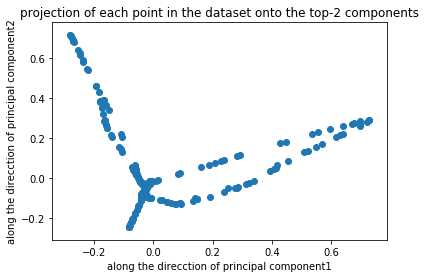

Kernel PCA for Exponential Kernel Map function with sigma  0.2
variance along maximum eigen vector
(2.3934580140210304+0j)
variance along second maximum eigen vector
(2.169895090350989+0j)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


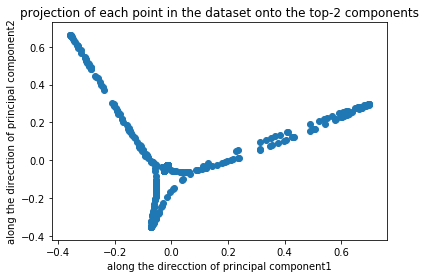

Kernel PCA for Exponential Kernel Map function with sigma  0.3
variance along maximum eigen vector
(3.4102060029658126+0j)
variance along second maximum eigen vector
(3.0314726532837932+0j)


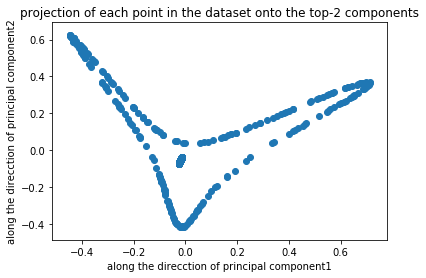

Kernel PCA for Exponential Kernel Map function with sigma  0.4
variance along maximum eigen vector
(4.327999589589939+0j)
variance along second maximum eigen vector
(3.782429518155212+0j)


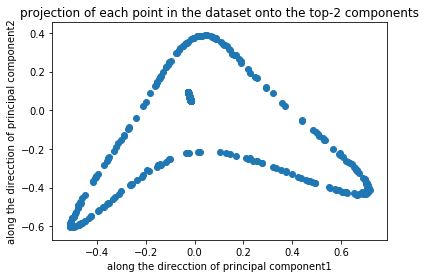

Kernel PCA for Exponential Kernel Map function with sigma  0.5
variance along maximum eigen vector
(5.129707836674097+0j)
variance along second maximum eigen vector
(4.4956777790828015+0j)


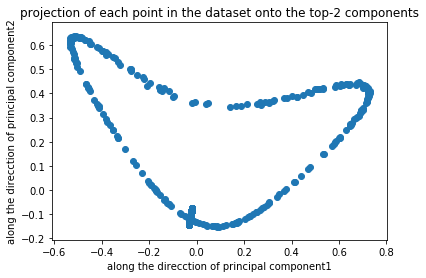

Kernel PCA for Exponential Kernel Map function with sigma  0.6
variance along maximum eigen vector
(5.775854081469021+0j)
variance along second maximum eigen vector
(5.318868526368117+0j)


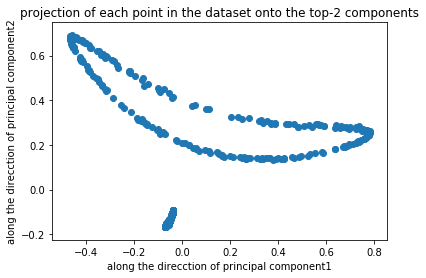

Kernel PCA for Exponential Kernel Map function with sigma  0.7
variance along maximum eigen vector
(6.435231684725467+0j)
variance along second maximum eigen vector
(6.025418760900352+0j)


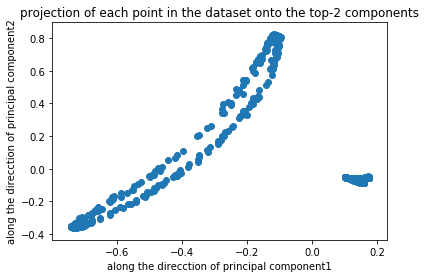

Kernel PCA for Exponential Kernel Map function with sigma  0.8
variance along maximum eigen vector
(7.405184255694549+0j)
variance along second maximum eigen vector
(6.243693976808587+0j)


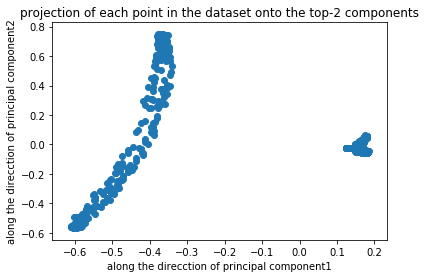

Kernel PCA for Exponential Kernel Map function with sigma  0.9
variance along maximum eigen vector
(8.40810314985004+0j)
variance along second maximum eigen vector
(6.273518566700462+0j)


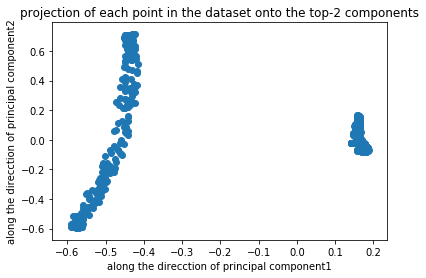

Kernel PCA for Exponential Kernel Map function with sigma  1.0
variance along maximum eigen vector
(9.369748261244858+0j)
variance along second maximum eigen vector
(6.276936610656228+0j)


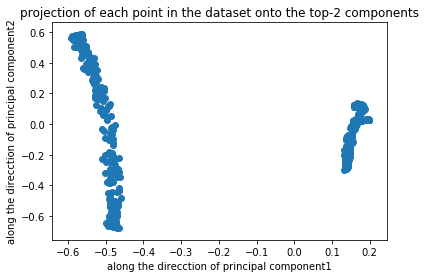

In [19]:
#partB
step = 1
for i in range(1,11,step):
    print("Kernel PCA for Exponential Kernel Map function with sigma ", (i/10))
    #compute the kernel map
    Kernel = findKernelExponental(i/10)
    #center in higher dimension
    Kcentered = centerKernel(Kernel)
    #perform the PCA
    exponentialPCA(Kcentered)